<a href="https://colab.research.google.com/github/abishekbabuofficial/Green-Doc-AI/blob/main/VGG16_Classifier_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

# Dataset Handling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: unzip the folder

!unzip -uq "/content/drive/MyDrive/Projects/VGG_plant/newds.zip" -d "/content/DS/"


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/DS/newds/train'
valid_path = '/content/DS/newds/test'


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/DS/newds/train/*')

In [ ]:
folders

['/content/DS/newds/train/Tomato___Septoria_leaf_spot',
 '/content/DS/newds/train/Tomato___Late_blight',
 '/content/DS/newds/train/Potato___Late_blight',
 '/content/DS/newds/train/Apple___Black_rot',
 '/content/DS/newds/train/Potato___healthy',
 '/content/DS/newds/train/Apple___Apple_scab',
 '/content/DS/newds/train/Tomato___Bacterial_spot',
 '/content/DS/newds/train/Apple___healthy',
 '/content/DS/newds/train/Apple___Cedar_apple_rust',
 '/content/DS/newds/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/DS/newds/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/DS/newds/train/Potato___Early_blight',
 '/content/DS/newds/train/Tomato___healthy',
 '/content/DS/newds/train/Tomato___Leaf_Mold',
 '/content/DS/newds/train/Tomato___Early_blight']

# Model Initialization

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │         376,335 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,091,023 (57.57 MB)

 Trainable params: 376,335 (1.44 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Data Augmentation for test and train (Preprocessing)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/DS/newds/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6268 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/DS/newds/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2050 images belonging to 15 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 131s 571ms/step - accuracy: 0.5617 - loss: 1.4973 - val_accuracy: 0.7990 - val_loss: 0.6752
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 111us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


196/196 ━━━━━━━━━━━━━━━━━━━━ 94s 469ms/step - accuracy: 0.8681 - loss: 0.3963 - val_accuracy: 0.8259 - val_loss: 0.5527
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 464ms/step - accuracy: 0.9091 - loss: 0.2813 - val_accuracy: 0.8644 - val_loss: 0.4970
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 473ms/step - accuracy: 0.9170 - loss: 0.2392 - val_accuracy: 0.8498 - val_loss: 0.5261
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 470ms/step - accuracy: 0.9358 - loss: 0.1848 - val_accuracy: 0.8766 - val_loss: 0.4432
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 97s 482ms/step - accuracy: 0.9486 - loss: 0.1629 - val_accuracy: 0

# Model Performance

In [ ]:
import matplotlib.pyplot as plt

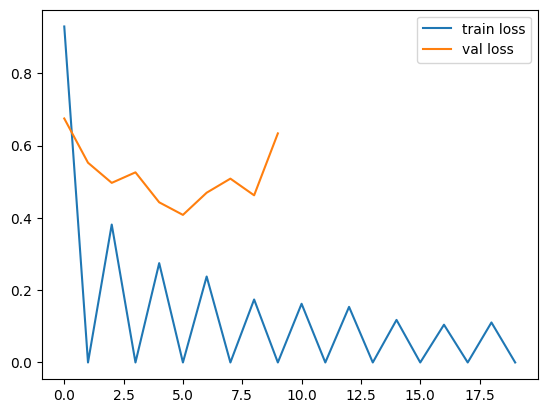

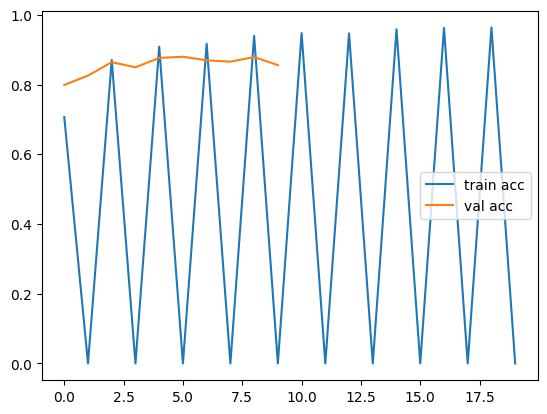

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Save Model

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Projects/VGG_plant/model_vgg16.keras')

# Predict the test_set

In [ ]:

y_pred = model.predict(test_set)


65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step


In [ ]:
y_pred

array([[1.0385012e-09, 2.7401692e-10, 2.1566928e-08, ..., 1.1065088e-08,
        3.0037997e-09, 2.5582136e-10],
       [4.5943690e-08, 1.3868448e-09, 3.8702674e-06, ..., 2.1557858e-05,
        5.4653317e-12, 4.0348332e-06],
       [2.7748587e-10, 2.5707277e-11, 1.1425893e-07, ..., 2.3731938e-15,
        3.1786027e-09, 6.5997828e-12],
       ...,
       [9.4886190e-01, 4.8156261e-02, 5.6963723e-05, ..., 4.7759263e-10,
        4.2155016e-11, 5.2500860e-07],
       [2.1296917e-11, 5.9804297e-06, 4.3751687e-09, ..., 2.6830593e-10,
        2.6502267e-11, 2.5275876e-10],
       [3.8493284e-10, 1.0823846e-10, 9.7853743e-08, ..., 4.8660720e-10,
        3.9004026e-11, 9.9844629e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([ 7,  3,  9, ...,  0,  4, 14])

In [ ]:
# prompt: how to display the test_set generated

import numpy as np
import pandas as pd

# Assuming 'test_set' is your ImageDataGenerator object
# Get the filenames from the test_set
filenames = test_set.filenames

# Get the ground truth labels
y_true = test_set.classes

# Display the predictions and true labels along with filenames
results = pd.DataFrame({"Filename":filenames,
                       "Predictions":y_pred,
                       "Ground Truth":y_true})
results

,Filename,Predictions,Ground Truth
0,Apple___Apple_scab/023123cb-7b69-4c9f-a521-766...,7,0
1,Apple___Apple_scab/023123cb-7b69-4c9f-a521-766...,3,0
2,Apple___Apple_scab/029424b0-0ef5-491b-9ef5-069...,9,0
3,Apple___Apple_scab/029424b0-0ef5-491b-9ef5-069...,3,0
4,Apple___Apple_scab/029424b0-0ef5-491b-9ef5-069...,1,0
...,...,...,...
2045,Tomato___healthy/3d8a687c-febd-4bd6-8fa5-62a3e...,6,14
2046,Tomato___healthy/Tomato___healthy(1).JPG,11,14
2047,Tomato___healthy/Tomato___healthy(2).JPG,0,14
2048,Tomato___healthy/Tomato___healthy(3).JPG,4,14


# Testing the Model

Saving potato-blight.jpg to potato-blight (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
4
Predicted class: Potato Early Blight


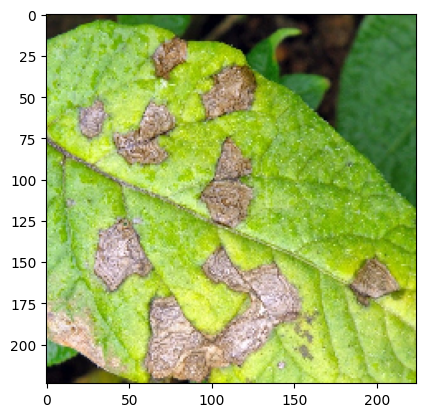

In [ ]:
# prompt: test the model with a new image I upload and I should display the class

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/Projects/VGG_plant/model_vgg16.keras')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale
    # print(img_array)
    return img_array


# Upload the image (you'll need to run this cell and select the image)
from google.colab import files
uploaded = files.upload()

# Get the image filename
for fn in uploaded.keys():
    img_path = fn

# Preprocess and predict
img = preprocess_image(img_path)
prediction = model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(predicted_class)
# Class names (replace with your actual class names)
class_names = ['Apple Scab', 'Apple Black Rot', 'Apple Cedar Rust','Apple healthy',
               'Potato Early Blight','Potato Late Blight','Potato Healthy',
               'Tomato Bacterial Spot', ' Tomato Early Blight', 'Tomato Late Blight', 'Tomato Leaf Mold','Tomato Septoria Leaf Spot','Tomato Spider Mites','Tomato Yellow leaf curl','Tomato Healthy'] # Example - replace with your actual classes

# Display the prediction
print("Predicted class:", class_names[predicted_class])

# Display the image
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/Projects/VGG_plant/model_vgg16.keras')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale
    print(img_array)
    return img_array


# Upload the image (you'll need to run this cell and select the image)
from google.colab import files
uploaded = files.upload()

# Get the image filename
for fn in uploaded.keys():
    img_path = fn

# Preprocess and predict
img = preprocess_image(img_path)
prediction = model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(predicted_class)
# Class names (replace with your actual class names)
class_names = ['Apple Scab', 'Apple Black Rot', 'Apple Cedar Rust','Apple healthy',
               'Potato Early Blight','Potato Late Blight','Potato Healthy',
               'Tomato Bacterial Spot', ' Tomato Early Blight', 'Tomato Late Blight', 'Tomato Leaf Mold','Tomato Septoria Leaf Spot','Tomato Spider Mites','Tomato Yellow leaf curl','Tomato Healthy'] # Example - replace with your actual classes

# Display the prediction
print("Predicted class:", class_names[predicted_class])

# Display the image
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.show()